In [1]:
import pandas as pd
import magic_launcher as magic
from sklearn import decomposition, preprocessing
from functions import *

In [2]:
# import de l'échantillon
data = magic.getDataset()
data.color = data.color.str.len()
data.rarity = data.rarity.replace({'common':0, 'uncommon':1, 'rare':2, 'mythic': 3})
data = data.set_index('name')
data = data[['color', 'cmc', 'rarity', 'power', 'toughness', 'price_usd']]
data = data.dropna()

In [3]:
n_comp = 4
X = data.values
names = data.index
features = data.columns

In [4]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [5]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=4)

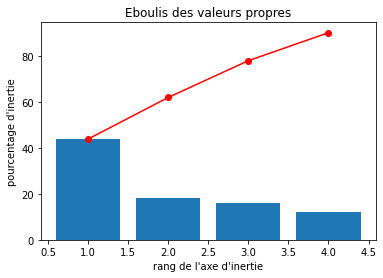

In [6]:
# Eboulis des valeurs propres
display_scree_plot(pca)

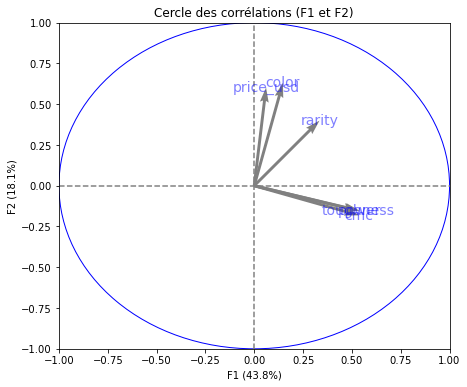

In [7]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

In [9]:
# Projection des individus
%matplotlib
theme = data.
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = theme)

Using matplotlib backend: Qt5Agg
